In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
! pip install stemming

# 第6章: 英語テキストの処理
英語のテキスト（nlp.txt）に対して，以下の処理を実行せよ．

## 50. 文区切り
(. or ; or : or ? or !) → 空白文字 → 英大文字というパターンを文の区切りと見なし，入力された文書を1行1文の形式で出力せよ．

In [0]:
import re

nlp_file = "/content/drive/My Drive/Colab Notebooks/Python100本ノック/nlp.txt"
with open(nlp_file) as f:
    data = f.read()
    for line in re.split('[.;:?!] [A-Z]', data):
        print(line)

Natural language processing
From Wikipedia, the free encyclopedia

Natural language processing (NLP) is a field of computer science, artificial intelligence, and linguistics concerned with the interactions between computers and human (natural) languages
s such, NLP is related to the area of humani-computer interaction
any challenges in NLP involve natural language understanding, that is, enabling computers to derive meaning from human or natural language input, and others involve natural language generation.

History

The history of NLP generally starts in the 1950s, although work can be found from earlier periods
n 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English
he authors claimed that within three or five years, machine translation would be a solv

## 51. 単語の切り出し
空白を単語の区切りとみなし，50の出力を入力として受け取り，1行1単語の形式で出力せよ．ただし，文の終端では空行を出力せよ．

In [0]:
import re

nlp_file = "/content/drive/My Drive/Colab Notebooks/Python100本ノック/nlp.txt"
with open(nlp_file) as f:
    data = f.read()
    for line in re.split('[.;:?!] [A-Z]', data):
        for word in line.split(" "):
            print(word)
        print("\n")
        # 長いので1行分だけ出力
        break

Natural
language
processing
From
Wikipedia,
the
free
encyclopedia

Natural
language
processing
(NLP)
is
a
field
of
computer
science,
artificial
intelligence,
and
linguistics
concerned
with
the
interactions
between
computers
and
human
(natural)
languages




## 52. ステミング
51の出力を入力として受け取り，Porterのステミングアルゴリズムを適用し，単語と語幹をタブ区切り形式で出力せよ． Pythonでは，Porterのステミングアルゴリズムの実装としてstemmingモジュールを利用するとよい．

In [0]:
from nltk.stem.porter import PorterStemmer as ps

import re

nlp_file = "/content/drive/My Drive/Colab Notebooks/Python100本ノック/nlp.txt"
with open(nlp_file) as f:
    data = f.read()
    porter = ps()
    for line in re.split('[.;:?!] [A-Z]', data):
        for word in line.split(" "):
            print("{}\t{}".format(word, porter.stem(word)))
        print("\n")
        # 長いので1行分だけ出力
        break

Natural	natur
language	languag
processing
From	processing
from
Wikipedia,	wikipedia,
the	the
free	free
encyclopedia

Natural	encyclopedia

natur
language	languag
processing	process
(NLP)	(nlp)
is	is
a	a
field	field
of	of
computer	comput
science,	science,
artificial	artifici
intelligence,	intelligence,
and	and
linguistics	linguist
concerned	concern
with	with
the	the
interactions	interact
between	between
computers	comput
and	and
human	human
(natural)	(natural)
languages	languag




## 53. Tokenization
Stanford Core NLPを用い，入力テキストの解析結果をXML形式で得よ．また，このXMLファイルを読み込み，入力テキストを1行1単語の形式で出力せよ．

In [0]:
!apt install openjdk-8-jre
!java --version

In [0]:
URL_1="http://nlp.stanford.edu/software/stanford-corenlp-full-2013-06-20.zip"
URL_2="http://nlp.stanford.edu/software/stanford-corenlp-full-2016-10-31.zip"
FILE_NAME_1="stanford-corenlp-full-2013-06-20.zip"
FILE_NAME_2="stanford-corenlp-full-2016-10-31.zip"
! curl -L -O $URL_1
! curl -L -O $URL_2
! unzip $FILE_NAME_1 -d /usr/local/lib/
! unzip $FILE_NAME_2 -d /usr/local/lib/
! pip install corenlp-python 

In [0]:
!echo "annotators = tokenize, ssplit" > user.properties
# https://qiita.com/yubessy/items/1869ac2c66f4e76cd6c5
!cp user.properties /usr/local/lib/stanford-corenlp-full-2013-06-20/

In [0]:
# XMLの作成
!java -cp "/usr/local/lib/stanford-corenlp-full-2013-06-20/*" -Xmx3g edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit -file /content/nlp.txt

Adding annotator tokenize
Adding annotator ssplit

Processing file /content/nlp.txt ... writing to /content/nlp.txt.xml [0.214 seconds]
Annotation pipeline timing information:
PTBTokenizerAnnotator: 0.1 sec.
WordsToSentencesAnnotator: 0.0 sec.
TOTAL: 0.1 sec. for 1452 tokens at 10755.6 tokens/sec.
Pipeline setup: 0.1 sec.
Total time for StanfordCoreNLP pipeline: 0.5 sec.


In [0]:
import json
import corenlp

# パーサの生成
corenlp_dir = "/usr/local/lib/stanford-corenlp-full-2013-06-20/"
properties_file = "./user.properties" 
parser = corenlp.StanfordCoreNLP(corenlp_path=corenlp_dir, properties=properties_file)

# パースして結果をpretty print
#result_json = json.loads(parser.parse("I am Alice."))
result_json = parser.parse("I am Alice.")
print(result_json)

{"sentences": [{"words": [["I", {"CharacterOffsetBegin": "0", "CharacterOffsetEnd": "1"}], ["am", {"CharacterOffsetBegin": "2", "CharacterOffsetEnd": "4"}], ["Alice", {"CharacterOffsetBegin": "5", "CharacterOffsetEnd": "10"}], [".", {"CharacterOffsetBegin": "10", "CharacterOffsetEnd": "11"}]], "parsetree": [], "dependencies": [], "indexeddependencies": [], "text": "I am Alice."}]}


In [0]:
import xml.etree.ElementTree as et

root = et.parse('nlp.txt.xml')
for ind, word in enumerate(root.iter('word')):
    if ind > 4:
        break
    # 多いので5行分だけ出力
    print(word.text)

Natural
language
processing
From
Wikipedia


## 54. 品詞タグ付け
Stanford Core NLPの解析結果XMLを読み込み，単語，レンマ，品詞をタブ区切り形式で出力せよ．

In [0]:
!echo "annotators = tokenize, ssplit, pos, lemma" > user.properties
# https://qiita.com/yubessy/items/1869ac2c66f4e76cd6c5
!cp user.properties /usr/local/lib/stanford-corenlp-full-2013-06-20/

In [0]:
# XMLの作成
!java -cp "/usr/local/lib/stanford-corenlp-full-2013-06-20/*" -Xmx3g edu.stanford.nlp.pipeline.StanfordCoreNLP -annotators tokenize,ssplit,pos,lemma -file /content/nlp.txt

Adding annotator tokenize
Adding annotator ssplit
Adding annotator pos
Reading POS tagger model from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [2.4 sec].
Adding annotator lemma

Processing file /content/nlp.txt ... writing to /content/nlp.txt.xml [0.179 seconds]
Annotation pipeline timing information:
PTBTokenizerAnnotator: 0.2 sec.
WordsToSentencesAnnotator: 0.0 sec.
POSTaggerAnnotator: 0.2 sec.
MorphaAnnotator: 0.1 sec.
TOTAL: 0.5 sec. for 1452 tokens at 2709.0 tokens/sec.
Pipeline setup: 2.4 sec.
Total time for StanfordCoreNLP pipeline: 3.2 sec.


In [0]:
import xml.etree.ElementTree as et

root = et.parse('nlp.txt.xml')
for word, lemma, pos in zip(root.iter('word'), root.iter("lemma"), root.iter("POS")):
    print("{}\t{}\t{}".format(word.text, lemma.text, pos.text))
    # 量が多いので1単語分のみ
    break

Natural	natural	JJ


## 55. 固有表現抽出
入力文中の人名をすべて抜き出せ．

In [0]:
!echo "annotators = tokenize, ssplit, pos, lemma, ner" > user.properties
# https://qiita.com/yubessy/items/1869ac2c66f4e76cd6c5
!cp user.properties /usr/local/lib/stanford-corenlp-full-2013-06-20/

In [0]:
# XMLの作成
!java -cp "/usr/local/lib/stanford-corenlp-full-2013-06-20/*" -Xmx3g edu.stanford.nlp.pipeline.StanfordCoreNLP \
  -annotators tokenize,ssplit,pos,lemma,ner -ner.useSUTime 0 -file /content/nlp.txt

Adding annotator tokenize
Adding annotator ssplit
Adding annotator pos
Reading POS tagger model from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [2.2 sec].
Adding annotator lemma
Adding annotator ner
Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [3.7 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.muc.7class.distsim.crf.ser.gz ... done [2.5 sec].
Loading classifier from edu/stanford/nlp/models/ner/english.conll.4class.distsim.crf.ser.gz ... done [2.3 sec].

Processing file /content/nlp.txt ... writing to /content/nlp.txt.xml [0.176 seconds]
Annotation pipeline timing information:
PTBTokenizerAnnotator: 0.1 sec.
WordsToSentencesAnnotator: 0.0 sec.
POSTaggerAnnotator: 0.2 sec.
MorphaAnnotator: 0.1 sec.
NERCombinerAnnotator: 1.5 sec.
TOTAL: 1.9 sec. for 1452 tokens at 757.0 tokens/sec.
Pipeline setup: 11.0 sec.
Total time for StanfordCoreNLP pipeline: 13.1 sec.


In [0]:
import xml.etree.ElementTree as et

root = et.parse('nlp.txt.xml')
for ner, word in zip(root.iter('NER'), root.iter("word")):
    # 量が多いので1単語分のみ
    if ner.text == "PERSON":
        print(word.text)

Alan
Turing
ELIZA
Joseph
Weizenbaum
Wilensky
Meehan
Lehnert
Carbonell
Lehnert
Jabberwacky
Moore


## 56. 共参照解析
Stanford Core NLPの共参照解析の結果に基づき，文中の参照表現（mention）を代表参照表現（representative mention）に置換せよ．ただし，置換するときは，「代表参照表現（参照表現）」のように，元の参照表現が分かるように配慮せよ．

In [0]:
!echo "annotators = tokenize, ssplit, pos, lemma, ner, parse, dcoref" > user.properties
# https://qiita.com/yubessy/items/1869ac2c66f4e76cd6c5
!cp user.properties /usr/local/lib/stanford-corenlp-full-2016-10-31/

In [7]:
# XMLの作成
!java -cp "/usr/local/lib/stanford-corenlp-full-2016-10-31/*" -Xmx5g edu.stanford.nlp.pipeline.StanfordCoreNLP \
  -annotators tokenize,ssplit,pos,lemma,ner,parse,dcoref -ner.useSUTime 0 -file /content/nlp.txt

[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator tokenize
[main] INFO edu.stanford.nlp.pipeline.TokenizerAnnotator - No tokenizer type provided. Defaulting to PTBTokenizer.
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ssplit
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator pos
[main] INFO edu.stanford.nlp.tagger.maxent.MaxentTagger - Loading POS tagger from edu/stanford/nlp/models/pos-tagger/english-left3words/english-left3words-distsim.tagger ... done [2.3 sec].
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator lemma
[main] INFO edu.stanford.nlp.pipeline.StanfordCoreNLP - Adding annotator ner
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.all.3class.distsim.crf.ser.gz ... done [2.3 sec].
[main] INFO edu.stanford.nlp.ie.AbstractSequenceClassifier - Loading classifier from edu/stanford/nlp/models/ner/english.muc.7cla

In [19]:
import xml.etree.ElementTree as et
# sentence = sentence id
# start = token start id
# end = token end id


def create_mention_data(root_document):
    result = {}
    for coreference in root_document.iterfind('./document/coreference/coreference'):
        represent = coreference.findtext('./mention[@representative="true"]/text')
        for mention in coreference.iterfind('./mention'):
            if mention.get('representative', 'false') == 'true':
                continue
            sentence = int(mention.findtext('sentence'))
            start = int(mention.findtext('start'))
            end = int(mention.findtext('end'))
            src_word = mention.findtext('text')
            if (sentence, start) in result:
                continue
            result[(sentence, start)] = {
                'end_token_id': end,
                'src_word': src_word,
                'represent': represent,
            }
    return result

def replace_to_represent_data(xml_file):
    replaced_data = []
    root = et.parse(xml_file)
    mention_data = create_mention_data(root)
    replace_cnt = 0
    in_replacing = False
    for sentence in root.iterfind('./document/sentences/sentence'):
        sentence_id = int(sentence.get('id'))
        for token in sentence.iterfind('./tokens/token'):
            if replace_cnt:
                replace_cnt -= 1
                if replace_cnt == 0:
                    replaced_data.append(mention_data[(sentence_id, token_id)]['represent'])
                    replaced_data.append('[{}]'.format(mention_data[(sentence_id, token_id)]['src_word']))
            else:
                token_id = int(token.get('id'))
                if (sentence_id, token_id) not in mention_data:
                    replaced_data.append(token.findtext('word'))
                    continue
                replace_cnt = mention_data[(sentence_id, token_id)]['end_token_id'] - token_id
                if replace_cnt == 0:
                    replaced_data.append(mention_data[(sentence_id, token_id)]['represent'])
                    replaced_data.append('[{}]'.format(mention_data[(sentence_id, token_id)]['src_word']))
    return replaced_data


result = replace_to_represent_data('nlp.txt.xml')
print(' '.join(result))

Natural language processing From Wikipedia , the free encyclopedia Natural language processing -LRB- NLP -RRB- is the free encyclopedia Natural language processing -LRB- NLP -RRB- [a field of computer science] artificial intelligence , and linguistics concerned with the interactions between computers and human -LRB- natural -RRB- languages . As such , NLP is related to the area of humani-computer interaction . Many challenges in NLP involve natural language understanding , that is , enabling computers [computers] derive meaning from human or natural language input , and others involve natural language generation . History The history of NLP generally starts in the 1950s , although work can be found from earlier periods . In 1950 , Alan Turing published an article titled `` Computing Machinery and Intelligence '' which proposed what is now called the Alan Turing [Turing] as a criterion of intelligence . The Georgetown experiment in 1954 involved fully automatic translation of more than 

## 57. 係り受け解析
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

In [0]:
!pip install graphviz pydot

sentence_1.png


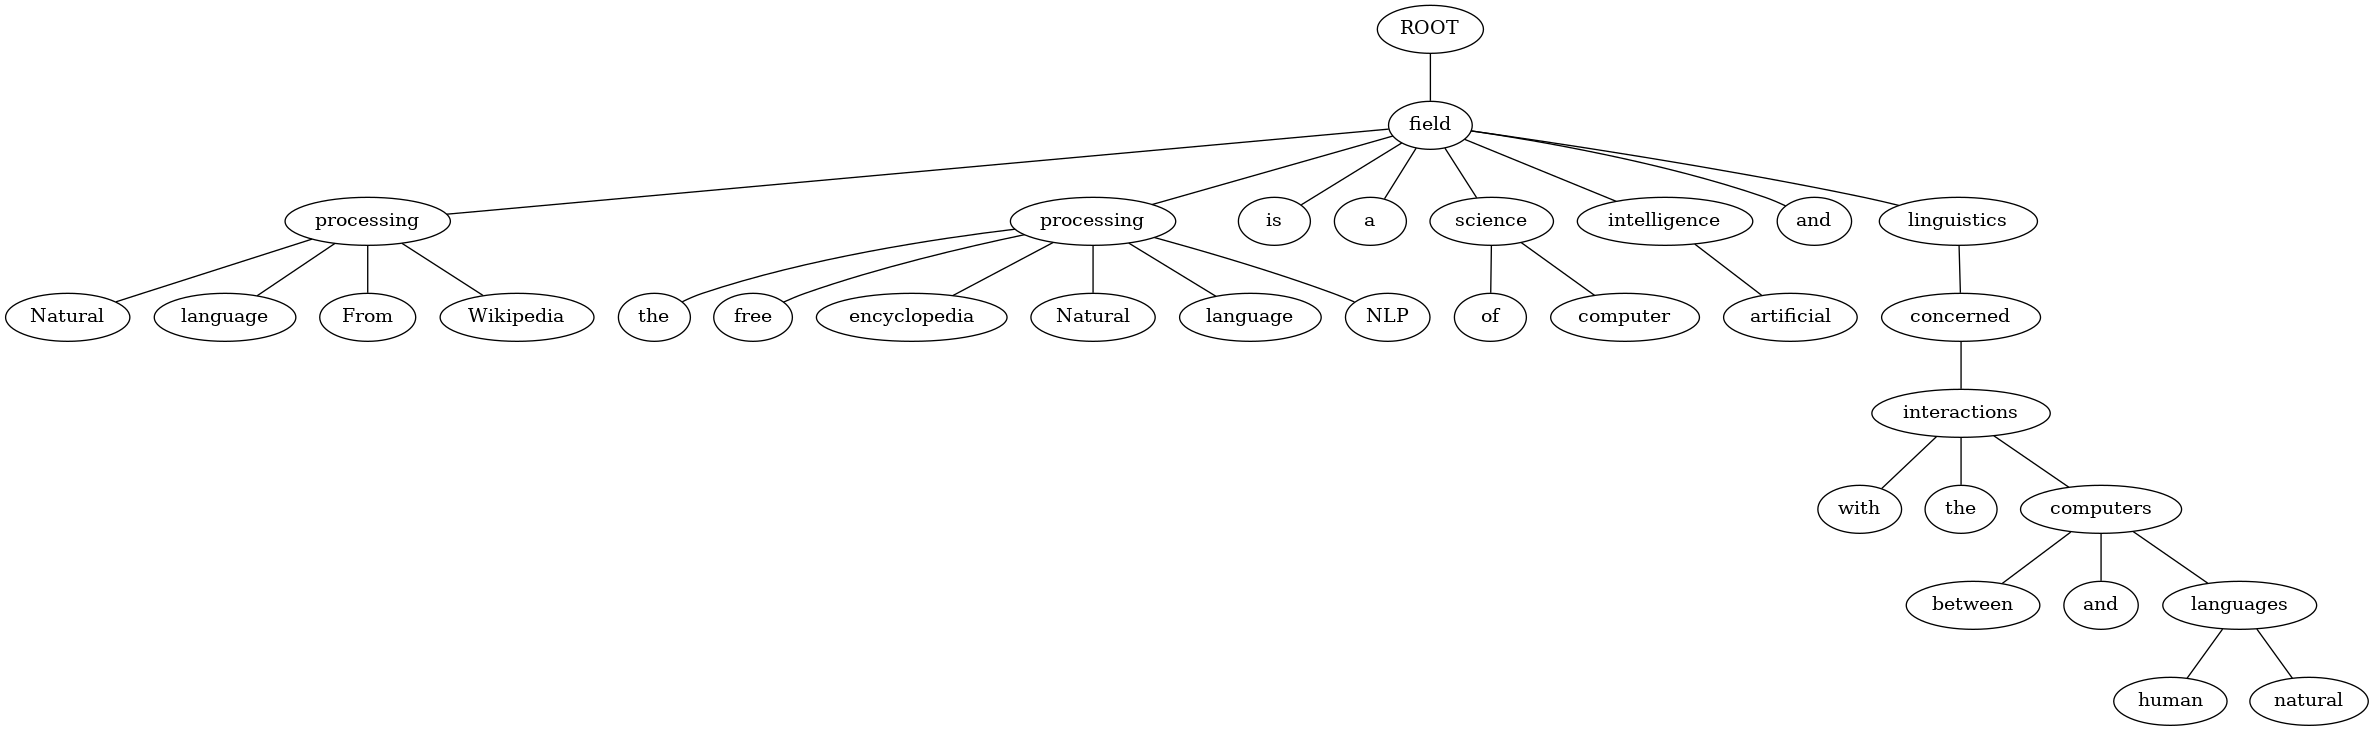

sentence_2.png


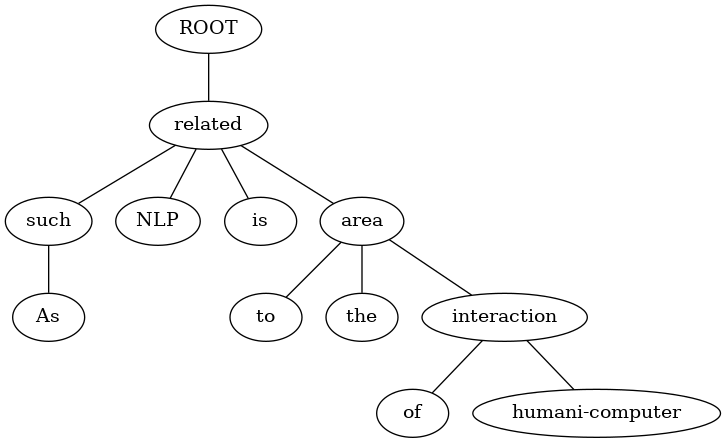

sentence_3.png


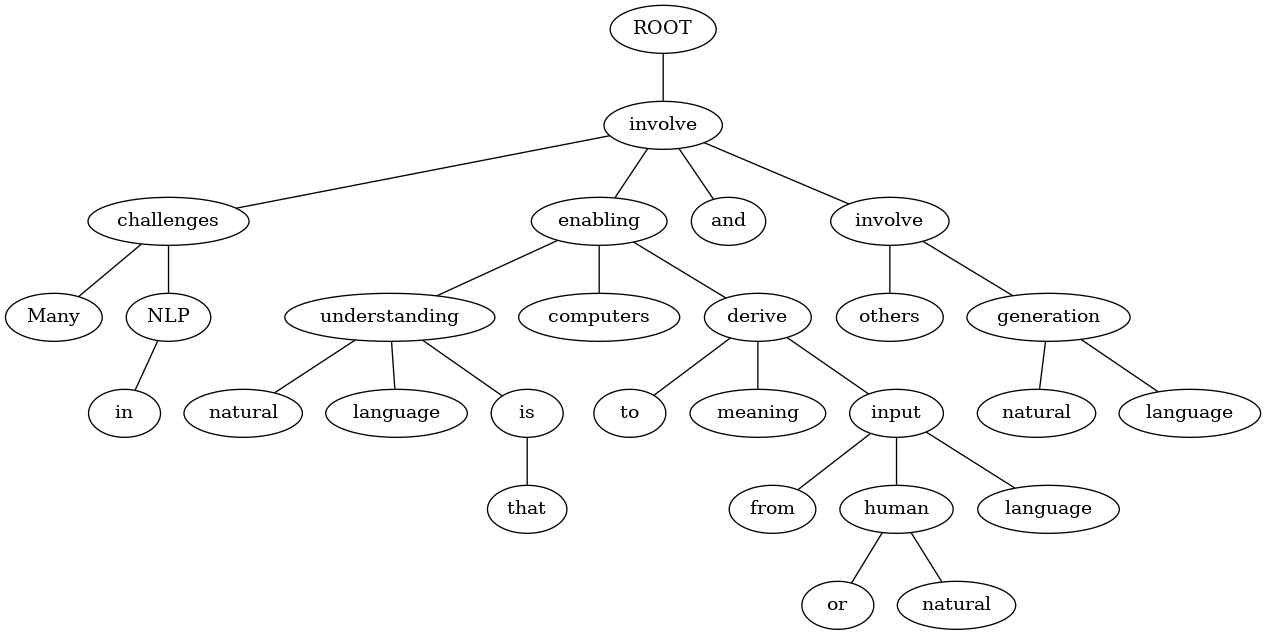

In [38]:
from IPython.display import Image,display_png
from pydot import Dot, Node, Edge

import xml.etree.ElementTree as et
# sentence = sentence id
# start = token start id
# end = token end id


def create_mention_data(root_document):
    result = {}
    for coreference in root_document.iterfind('./document/coreference/coreference'):
        represent = coreference.findtext('./mention[@representative="true"]/text')
        for mention in coreference.iterfind('./mention'):
            if mention.get('representative', 'false') == 'true':
                continue
            sentence = int(mention.findtext('sentence'))
            start = int(mention.findtext('start'))
            end = int(mention.findtext('end'))
            src_word = mention.findtext('text')
            if (sentence, start) in result:
                continue
            result[(sentence, start)] = {
                'end_token_id': end,
                'src_word': src_word,
                'represent': represent,
            }
    return result

def replace_to_represent_data(xml_file):
    replaced_data = []
    root = et.parse(xml_file)
    mention_data = create_mention_data(root)
    replace_cnt = 0
    in_replacing = False
    for sentence in root.iterfind('./document/sentences/sentence'):
        sentence_id = int(sentence.get('id'))
        for token in sentence.iterfind('./tokens/token'):
            if replace_cnt:
                replace_cnt -= 1
                if replace_cnt == 0:
                    replaced_data.append(mention_data[(sentence_id, token_id)]['represent'])
                    replaced_data.append('[{}]'.format(mention_data[(sentence_id, token_id)]['src_word']))
            else:
                token_id = int(token.get('id'))
                if (sentence_id, token_id) not in mention_data:
                    replaced_data.append(token.findtext('word'))
                    continue
                replace_cnt = mention_data[(sentence_id, token_id)]['end_token_id'] - token_id
                if replace_cnt == 0:
                    replaced_data.append(mention_data[(sentence_id, token_id)]['represent'])
                    replaced_data.append('[{}]'.format(mention_data[(sentence_id, token_id)]['src_word']))
    return replaced_data

def create_edge_data(xml_file):
    edge_data = []
    root = et.parse(xml_file)
    for sentence in root.iterfind('./document/sentences/sentence'):
        sentence_id = int(sentence.get('id'))
        for dep in sentence.iterfind('./dependencies[@type="collapsed-dependencies"]/dep'):
            if dep.get('type') == 'punct':
                #句読点
                continue
            govr = dep.find('./governor')
            dept = dep.find('./dependent')
            edge_data.append(
                ((govr.get('idx'), govr.text), (dept.get('idx'), dept.text), sentence_id)
            )
    return edge_data

def create_graphs(edge_data):
    result = []
    for ind, edge in enumerate(edge_data):
        if ind == 0:
            sentence_id = edge[2]
            graph = Dot(graph_type='graph')
        if sentence_id != edge[2]:
            result.append((sentence_id, graph))
            sentence_id = edge[2]
            graph = Dot(graph_type='graph')
        graph.add_node(Node(str(edge[0][0]), label=edge[0][1]))
        graph.add_node(Node(str(edge[1][0]), label=edge[1][1]))
        graph.add_edge(Edge(str(edge[0][0]), str(edge[1][0])))
    return result



xml_file = 'nlp.txt.xml'
edge_data = create_edge_data(xml_file)
for num, graph_data in enumerate(create_graphs(edge_data)):
    file_name = 'sentence_{}.png'.format(graph_data[0])
    graph_data[1].write_png(file_name)
    if num < 3:
        # 数が多いので3画像分だけ描写
        print(file_name)
        display_png(Image(file_name))

## 58. タプルの抽出
Stanford Core NLPの係り受け解析の結果（collapsed-dependencies）に基づき，「主語 述語 目的語」の組をタブ区切り形式で出力せよ．ただし，主語，述語，目的語の定義は以下を参考にせよ．

* 述語: nsubj関係とdobj関係の子（dependant）を持つ単語
* 主語: 述語からnsubj関係にある子（dependent）
* 目的語: 述語からdobj関係にある子（dependent）


In [47]:
from IPython.display import Image,display_png
from pydot import Dot, Node, Edge

import xml.etree.ElementTree as et
# sentence = sentence id
# start = token start id
# end = token end id


def create_mention_data(root_document):
    result = {}
    for coreference in root_document.iterfind('./document/coreference/coreference'):
        represent = coreference.findtext('./mention[@representative="true"]/text')
        for mention in coreference.iterfind('./mention'):
            if mention.get('representative', 'false') == 'true':
                continue
            sentence = int(mention.findtext('sentence'))
            start = int(mention.findtext('start'))
            end = int(mention.findtext('end'))
            src_word = mention.findtext('text')
            if (sentence, start) in result:
                continue
            result[(sentence, start)] = {
                'end_token_id': end,
                'src_word': src_word,
                'represent': represent,
            }
    return result

def replace_to_represent_data(xml_file):
    replaced_data = []
    root = et.parse(xml_file)
    mention_data = create_mention_data(root)
    replace_cnt = 0
    in_replacing = False
    for sentence in root.iterfind('./document/sentences/sentence'):
        sentence_id = int(sentence.get('id'))
        for token in sentence.iterfind('./tokens/token'):
            if replace_cnt:
                replace_cnt -= 1
                if replace_cnt == 0:
                    replaced_data.append(mention_data[(sentence_id, token_id)]['represent'])
                    replaced_data.append('[{}]'.format(mention_data[(sentence_id, token_id)]['src_word']))
            else:
                token_id = int(token.get('id'))
                if (sentence_id, token_id) not in mention_data:
                    replaced_data.append(token.findtext('word'))
                    continue
                replace_cnt = mention_data[(sentence_id, token_id)]['end_token_id'] - token_id
                if replace_cnt == 0:
                    replaced_data.append(mention_data[(sentence_id, token_id)]['represent'])
                    replaced_data.append('[{}]'.format(mention_data[(sentence_id, token_id)]['src_word']))
    return replaced_data

def create_edge_data(xml_file):
    edge_data = []
    root = et.parse(xml_file)
    for sentence in root.iterfind('./document/sentences/sentence'):
        sentence_id = int(sentence.get('id'))
        for dep in sentence.iterfind('./dependencies[@type="collapsed-dependencies"]/dep'):
            if dep.get('type') == 'punct':
                #句読点
                continue
            govr = dep.find('./governor')
            dept = dep.find('./dependent')
            edge_data.append(
                ((govr.get('idx'), govr.text), (dept.get('idx'), dept.text), sentence_id)
            )
    return edge_data

def create_graphs(edge_data):
    result = []
    for ind, edge in enumerate(edge_data):
        if ind == 0:
            sentence_id = edge[2]
            graph = Dot(graph_type='graph')
        if sentence_id != edge[2]:
            result.append((sentence_id, graph))
            sentence_id = edge[2]
            graph = Dot(graph_type='graph')
        graph.add_node(Node(str(edge[0][0]), label=edge[0][1]))
        graph.add_node(Node(str(edge[1][0]), label=edge[1][1]))
        graph.add_edge(Edge(str(edge[0][0]), str(edge[1][0])))
    return result

def get_svo_data(xml_file):
    root = et.parse(xml_file)
    s_data, v_data, o_data = {}, {}, {}
    for sentence in root.iterfind('./document/sentences/sentence'):
        for dep in sentence.iterfind('./dependencies[@type="collapsed-dependencies"]/dep'):
            if dep.get('type') not in ('nsubj', 'dobj'):
                continue
            v_idx = dep.find('./governor').get('idx')
            if v_idx not in v_data:
                v_data[v_idx] = dep.findtext('./governor') # 述語
            if dep.get('type') == 'nsubj':
                s_data[v_idx] = dep.findtext('./dependent') # 主語
            else:
                o_data[v_idx] = dep.findtext('./dependent') # 目的語
    return s_data, v_data, o_data


xml_file = 'nlp.txt.xml'
s_data, v_data, o_data = get_svo_data(xml_file)
for k in v_data:
    if k not in s_data or k not in o_data:
        continue
    print('{0}\t{1}\t{2}'.format(v_data[k], s_data[k], o_data[k]))

involve	limit	rules
enabling	which	decisions
is	deal	more
derive	that	meaning
involve	others	expectations
starts	research	research
published	Systems	advantages
called	increase	decisions
claimed	models	data
failed	that	rules
written	it	subtasks
provide	that	complexity
say	you	weights
write	task	input
underlies	that	approach
produced	models	systems
focused	NLL	words
make	which	results
rely	Some	models
was	which	weights
express	aims	certainty


## S式の解析
Stanford Core NLPの句構造解析の結果（S式）を読み込み，文中のすべての名詞句（NP）を表示せよ．入れ子になっている名詞句もすべて表示すること．

In [197]:
from ast import literal_eval

xml_file = 'nlp.txt.xml'
root = et.parse(xml_file)
result = []
for num, parse in enumerate(root.iterfind('./document/sentences/sentence/parse')):
    parse = parse.text.replace("'s", """ "'s" """).replace('e.g.', '"e.g."').replace("  ", " ").replace("''", '""')
    parse = parse.replace(" '", ' ""').replace('. .', '"." "."').replace(". ", '"." ').replace('``', '"``"').replace(" `", ' "`"')
    parse = parse.replace(":", '":"').replace(", ,", '"," ","').strip().replace(' ', ',')
    parse = re.sub('([(,])([-a-zA-Z0-9$%!?]+)', r"\1'\2", parse)
    parse = re.sub('([-a-zA-Z0-9$%!?])([,|)])', r"\1'\2", parse)
    parse = literal_eval(parse)
    s_data = parse[1][1] # S
    for i in s_data:
        if i[0] != 'NP':
            continue
        for ind, ii in enumerate(i):
            if ind == 0:
                continue
            data = ii[1]
            i_type = type(data)
            while i_type != str:
                data = data[1]
                i_type = type(data)
            result.append(data)
    
print(result)

['Natural', 'language', 'processing', 'Wikipedia', 'such', 'Many', 'in', 'History', 'The', 'history', '1950', 'The', 'Georgetown', 'experiment', 'Little', 'further', 'research', 'Some', 'developed', 'the', '1970s', 'this', 'time', 'Some', 'The', 'cache', 'language', 'models', 'Many', 'most', 'other', 'systems', 'a', 'result', 'NLP', 'The', 'paradigm', 'A', 'corpus', 'Many', 'different', 'classes', 'Some', 'Systems', 'based', 'Automatic', 'Systems', 'The', 'subfield']
